__Files created__

- text.csv: text_api+text_tags_api+quality
- text_features.csv
- all_features.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Feature Extraction
- Features are extracted from the text and the text with HTML tags, dividing into five different groups

In [4]:
! pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import textstat
from textstat import syllable_count
from statistics import mean

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_api = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Data Collection2/text_api.csv')
text_api

,title,page_id,text
0,Mayan languages,182013,The Mayan languages form a language family spo...
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman..."
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...
4,Manhattan Project,19603,The Manhattan Project was a research and devel...
...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu..."
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...


In [ ]:
text_tags_api = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Data Collection2/text_tags_api.csv')
text_tags_api

,title,page_id,text_tags
0,Mayan languages,182013,{{short description|Language family spoken in ...
1,Mu'awiya I,207068,{{Short description|Founder of the Umayyad Cal...
2,The Fountainhead,180464,{{short description|1943 novel by Ayn Rand}}\n...
3,Northern pintail,218361,{{Short description|Migratory duck that breeds...
4,Manhattan Project,19603,{{Short description|World War II Allied nuclea...
...,...,...,...
5195,Party of Democratic Kampuchea,265468,{{short description|Former political party in ...
5196,Minawara and Multultu,95240,{{Short description|Figures in Australian Abor...
5197,Theophylline/ephedra/hydroxyzine,262652,{{Short description|Drug used for treatment of...
5198,"Channel Lake, Illinois",111450,{{Use mdy dates|date=July 2023}}\n{{Infobox se...


In [ ]:
text = text_api.merge(text_tags_api, on='title')
text

,title,page_id_x,text,page_id_y,text_tags
0,Mayan languages,182013,The Mayan languages form a language family spo...,182013,{{short description|Language family spoken in ...
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",207068,{{Short description|Founder of the Umayyad Cal...
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,180464,{{short description|1943 novel by Ayn Rand}}\n...
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,218361,{{Short description|Migratory duck that breeds...
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,19603,{{Short description|World War II Allied nuclea...
...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,265468,{{short description|Former political party in ...
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",95240,{{Short description|Figures in Australian Abor...
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,262652,{{Short description|Drug used for treatment of...
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,111450,{{Use mdy dates|date=July 2023}}\n{{Infobox se...


In [ ]:
text[text['page_id_x']!=text['page_id_y']]

,title,page_id_x,text,page_id_y,text_tags


In [ ]:
text.drop(['page_id_y'], axis=1, inplace=True)
text.rename(columns={'page_id_x': 'page_id'}, inplace=True)
text = text[['title', 'page_id', 'text', 'text_tags']]
text

,title,page_id,text,text_tags
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...
...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...


In [ ]:
text.isnull().sum()

title        0
page_id      0
text         0
text_tags    0
dtype: int64

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Data Collection2/dataset.csv')
data

,title,page_id,quality
0,Mayan languages,182013,FA
1,Mu'awiya I,207068,FA
2,The Fountainhead,180464,FA
3,Northern pintail,218361,FA
4,Manhattan Project,19603,FA
...,...,...,...
5195,Party of Democratic Kampuchea,265468,Stub
5196,Minawara and Multultu,95240,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,Stub
5198,"Channel Lake, Illinois",111450,Stub


In [ ]:
# Combined text and text with HTML tags data
combined = data.merge(text, on='title')
combined

,title,page_id_x,quality,page_id_y,text,text_tags
0,Mayan languages,182013,FA,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...
1,Mu'awiya I,207068,FA,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...
2,The Fountainhead,180464,FA,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...
3,Northern pintail,218361,FA,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...
4,Manhattan Project,19603,FA,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...
...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,Stub,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...
5196,Minawara and Multultu,95240,Stub,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...
5197,Theophylline/ephedra/hydroxyzine,262652,Stub,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...
5198,"Channel Lake, Illinois",111450,Stub,111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...


In [ ]:
combined[combined['page_id_x']!=combined['page_id_y']]

,title,page_id_x,quality,page_id_y,text,text_tags


In [ ]:
combined.drop(['page_id_y'], axis=1, inplace=True)
combined.rename(columns={'page_id_x': 'page_id'}, inplace=True)
combined = combined[['title', 'page_id', 'text', 'text_tags', 'quality']]
combined

,title,page_id,text,text_tags,quality
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA
...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub


In [ ]:
combined.to_csv('/content/drive/MyDrive/학교/Dissertation/Features/text.csv', index=False)

#### Selected Features

__length features__
- character count
- word count
- sentence count
- syllables count
- complex word(3 or more syllables) count

__structure features__
- section count
- subsection count
- paragraph count
- mean section size
- mean paragraph size
- longest section size
- shortest section size
- abstract size
- (abstract-text length ratio)
- citation count
- (citation per text length)
- external link count
- internal link count
- (links per text length)
- image count
- (image per text length)
- infobox

__style features__
- mean sentence size
- largest sentence size
- shortest sentence size
- question count
- exclamation count
- number of sentence starting with a first-person pronoun
- (number of sentence starting with a first-person pronoun-sentence ratio)

__readability features__
- automated readability index
- Coleman-Liau
- Flesch Reading Ease
- Flesch-Kincaid Score
- Gunning Fog index
- LIX
- Smog-Grading

__edit features__
- age of the article
- edit count
- editor count
- registered editor count
- anonymous editor count
- occasional editor count
- (edit per day)
- (edit per user)
- discussion count
- revert count

__quality__
- quality

In [6]:
text = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/text.csv')
text

,title,page_id,text,text_tags,quality
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA
...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub


In [ ]:
# Function to extract length features
def length_features(text):
    # Split the text by '== References ==' and similar titles, then take the first part
    text_split = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text, maxsplit=1)[0]

    # Remove '==title==' and '===title===' and '\n'
    text_cleaned = re.sub(r'==+.*?==+|\n', '', text_split)

    # Character count
    char_count = len(text_cleaned)

    # Word count
    words = word_tokenize(text_cleaned)
    word_count = len(words)

    # Sentence count
    sentences = sent_tokenize(text_cleaned)
    sentence_count = len(sentences)

    # Syllable count
    total_syllables = sum([syllable_count(word) for word in words])
    #avg_syllables_per_word = total_syllables / word_count if word_count else 0

    # Complex word count (words with 3 or more syllables)
    complex_word_count = sum([1 for word in words if syllable_count(word) >= 3])

    return char_count, word_count, sentence_count, total_syllables, complex_word_count

def length_features_to_dataframe(df, text_column):
    # Apply the analyze_text function to each row in the specified text column
    results = df[text_column].apply(length_features)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results.tolist(), columns=[
        'char_count', 'word_count', 'sentence_count', 'syllable_count', 'complex_word_count'
    ])

    # Concatenate the results with the original dataframe
    return pd.concat([df, results_df], axis=1)

In [ ]:
length_features = length_features_to_dataframe(text, 'text')
length_features

,title,page_id,text,text_tags,quality,char_count,word_count,sentence_count,syllable_count,complex_word_count
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,37370,6527,181,9294,957
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,67665,12267,338,16816,1571
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,36772,6647,243,9321,924
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,13230,2453,66,3181,226
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,101197,18039,582,26102,2908
...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,1927,323,8,515,65
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,421,83,4,101,6
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,282,54,3,66,4
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,2336,499,15,571,37


In [ ]:
# Function to extract structure features from the text data
def structure_features_text(text):
    # Section count and extraction including == title ==
    sections = re.findall(r'==[^=]*==.*?(?=\n==[^=]*==|$)', text, re.DOTALL)
    section_count = len(sections)

    # Subsection count and extraction including === title === within sections
    subsection_count = sum(len(re.findall(r'===[^=]*===', section)) for section in sections)

    # Split the text by '== References ==' and similar titles, then take the first part
    text_split = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text, maxsplit=1)[0]

    # Remove '==title==' and '===title==='
    text_cleaned = re.sub(r'==+.*?==+', '', text_split)

    # Paragraph count (paragraphs start with a letter or number after \n)
    paragraphs = re.split(r'\n(?=[A-Za-z0-9])', text_cleaned)
    paragraph_count = len(paragraphs)

    # Mean section size (mean number of characters per section)
    sections = re.findall(r'==[^=]*==.*?(?=\n==[^=]*==|$)', text_split, re.DOTALL)
    section_sizes = [len(section) for section in sections]
    mean_section_size = sum(section_sizes) / section_count if section_count else 0

    # Mean paragraph size (mean number of characters per paragraph)
    paragraph_sizes = [len(paragraph) for paragraph in paragraphs]
    mean_paragraph_size = sum(paragraph_sizes) / paragraph_count if paragraph_count else 0

    # Longest section size
    longest_section_size = max(section_sizes) if section_sizes else 0

    # Shortest section size
    shortest_section_size = min(section_sizes) if section_sizes else 0

    # Abstract size
    abstract = re.split(r'==[^=]*==', text)[0].strip()
    abstract_size = len(abstract)

    return section_count, subsection_count, paragraph_count, mean_section_size, mean_paragraph_size, longest_section_size, shortest_section_size, abstract_size

def structure_features_to_dataframe(df, text_column):
    # Apply the structure_features function to each row in the specified text column
    results = df[text_column].apply(structure_features_text)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results.tolist(), columns=[
        'section_count', 'subsection_count', 'paragraph_count', 'mean_section_size', 'mean_paragraph_size', 'longest_section_size', 'shortest_section_size', 'abstract_size'
    ])

    # Concatenate the results with the original dataframe
    return pd.concat([df, results_df], axis=1)

In [ ]:
structure_features = structure_features_to_dataframe(text, 'text')
structure_features

,title,page_id,text,text_tags,quality,section_count,subsection_count,paragraph_count,mean_section_size,mean_paragraph_size,longest_section_size,shortest_section_size,abstract_size
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,12,25,81,3021.500000,462.851852,7835,685,2041
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,14,17,75,4640.857143,903.333333,12983,1476,3563
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,11,21,54,3185.000000,682.574074,8464,305,2399
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,8,2,27,1476.000000,492.222222,2448,1196,1630
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,25,31,148,3970.640000,684.979730,19122,904,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,2,0,7,0.000000,275.714286,0,0,1933
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,1,0,1,0.000000,424.000000,0,0,421
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,1,0,1,0.000000,285.000000,0,0,282
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,3,2,7,746.666667,335.857143,1668,572,183


In [ ]:
# Function to extract structure features from the text with HTML tags data
def structure_features_text_tags(text):
    # Split the text by '== References ==' and similar titles, then take the first part
    text_split = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text, maxsplit=1)[0]

    # Count citations
    citation_count = len(re.findall(r'<ref', text_split))

    # Count external links
    external_link_count = len(re.findall(r'\[http', text_split))

    # Count internal links (excluding 'File:' and 'Category:')
    internal_link_count = len(re.findall(r'\[\[(?!File:|Category:)', text_split))

    # Count images
    image_count = len(re.findall(r'\[\[File:', text_split))

    # Check for infobox
    infobox = 1 if '{{infobox' in text_split.lower() else 0

    return citation_count, external_link_count, internal_link_count, image_count, infobox

def structure_features2_to_dataframe(df, text_column):
    # Apply the structure_features function to each row in the specified text column
    results = df[text_column].apply(structure_features_text_tags)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results.tolist(), columns=[
        'citation_count', 'external_link_count', 'internal_link_count', 'image_count', 'infobox'
    ])

    # Concatenate the results with the original dataframe
    return pd.concat([df, results_df], axis=1)

In [ ]:
structure_features2 = structure_features2_to_dataframe(text, 'text_tags')
structure_features2

,title,page_id,text,text_tags,quality,citation_count,external_link_count,internal_link_count,image_count,infobox
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,82,30,365,9,1
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,0,0,523,8,1
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,164,1,188,7,1
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,69,1,105,6,0
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,352,1,669,37,1
...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,8,3,24,0,1
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,1,0,11,0,0
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,3,0,9,0,1
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,10,0,49,0,1


In [ ]:
# Function to extract style features
def style_features(text):
    # Split the text by '== References ==' and similar titles, then take the first part
    text_split = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text, maxsplit=1)[0]

    # Remove '==title==' and '===title===' and '\n'
    text_cleaned = re.sub(r'==+.*?==+|\n', '', text_split)

    # Tokenize the cleaned text into sentences using NLTK
    sentences = nltk.sent_tokenize(text_cleaned)

    # Calculate mean sentence size
    sentence_lengths = [len(sentence) for sentence in sentences]
    mean_sentence_size = mean(sentence_lengths) if sentence_lengths else 0

    # Calculate largest sentence size
    largest_sentence_size = max(sentence_lengths) if sentence_lengths else 0

    # Calculate shortest sentence size
    shortest_sentence_size = min(sentence_lengths) if sentence_lengths else 0

    # Count question marks
    question_count = text_cleaned.count('?')

    # Count exclamation marks
    exclamation_count = text_cleaned.count('!')

    # Count sentences starting with a personal pronoun
    pronouns = set(['i', 'my', 'me', 'mine', 'we', 'us', 'our', 'ours', 'you', 'yours', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself'])
    pronoun_start_count = sum(1 for sentence in sentences if sentence.split()[0].lower() in pronouns)

    return mean_sentence_size, largest_sentence_size, shortest_sentence_size, question_count, exclamation_count, pronoun_start_count

def style_features_to_dataframe(df, text_column):
    # Apply the structure_features function to each row in the specified text column
    results = df[text_column].apply(style_features)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results.tolist(), columns=[
        'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size', 'question_count', 'exclamation_count', 'pronoun_start_count'
    ])

    # Concatenate the results with the original dataframe
    return pd.concat([df, results_df], axis=1)

In [ ]:
style_features = style_features_to_dataframe(text, 'text')
style_features

,title,page_id,text,text_tags,quality,mean_sentence_size,largest_sentence_size,shortest_sentence_size,question_count,exclamation_count,pronoun_start_count
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,205.430939,748,29,0,0,1
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,199.198225,577,32,0,0,35
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,150.333333,426,21,0,0,31
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,198.424242,497,3,0,0,0
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,172.886598,666,20,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,240.000000,506,58,0,0,0
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,104.250000,131,87,0,0,0
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,93.333333,104,83,0,0,0
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,154.800000,437,28,0,0,0


__readability scores__
- ARI: Automated Readability Index
- CLI: Coleman-Liau Index
- FRE: Flesch Reading Ease
- FKG: Flesch-Kincaid Grade Level
- GFI: Gunning Fog Index
- LIX
- SMOG: AMOG Grading

In [ ]:
# Function to extract readability features
def readability_features(text):
    # Split the text by '== References ==' and similar titles, then take the first part
    text_split = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text, maxsplit=1)[0]

    # Remove '==title==' and '===title===' and '\n'
    text_cleaned = re.sub(r'==+.*?==+|\n', '', text_split)

    ARI = textstat.automated_readability_index(text_split)
    CLI = textstat.coleman_liau_index(text_split)
    FRE = textstat.flesch_reading_ease(text_split)
    FKG = textstat.flesch_kincaid_grade(text_split)
    GFI = textstat.gunning_fog(text_split)
    LIX = textstat.lix(text_split)
    SMOG = textstat.smog_index(text_split)

    return ARI, CLI, FRE, FKG, GFI, LIX, SMOG

def readability_features_to_dataframe(df, text_column):
    # Apply the structure_features function to each row in the specified text column
    results = df[text_column].apply(readability_features)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results.tolist(), columns=[
        'ARI', 'CLI', 'FRE', 'FKG', 'GFI', 'LIX', 'SMOG'
    ])

    # Concatenate the results with the original dataframe
    return pd.concat([df, results_df], axis=1)

In [ ]:
readability_features = readability_features_to_dataframe(text, 'text')
readability_features

,title,page_id,text,text_tags,quality,ARI,CLI,FRE,FKG,GFI,LIX,SMOG
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,16.0,13.93,48.54,12.1,12.37,58.11,14.2
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,16.0,12.36,54.36,11.9,12.85,56.87,14.0
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,13.5,12.47,51.38,11.0,11.01,50.89,13.2
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,13.1,11.14,58.62,10.3,11.39,50.05,11.6
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,13.9,12.53,50.67,11.3,10.54,53.09,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,14.8,13.29,41.09,12.9,13.81,55.37,15.4
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,9.6,8.65,77.77,7.1,10.72,37.47,10.1
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,10.5,10.72,72.87,6.9,8.73,39.21,9.7
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,4.9,5.65,79.97,4.2,5.22,26.90,8.1


### Combining all the features

In [ ]:
combined1 = length_features.merge(structure_features, on='title')
combined1

,title,page_id_x,text_x,text_tags_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,...,text_tags_y,quality_y,section_count,subsection_count,paragraph_count,mean_section_size,mean_paragraph_size,longest_section_size,shortest_section_size,abstract_size
0,Mayan languages,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,37370,6527,181,9294,957,...,{{short description|Language family spoken in ...,FA,12,25,81,3021.500000,462.851852,7835,685,2041
1,Mu'awiya I,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,67665,12267,338,16816,1571,...,{{Short description|Founder of the Umayyad Cal...,FA,14,17,75,4640.857143,903.333333,12983,1476,3563
2,The Fountainhead,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,36772,6647,243,9321,924,...,{{short description|1943 novel by Ayn Rand}}\n...,FA,11,21,54,3185.000000,682.574074,8464,305,2399
3,Northern pintail,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,13230,2453,66,3181,226,...,{{Short description|Migratory duck that breeds...,FA,8,2,27,1476.000000,492.222222,2448,1196,1630
4,Manhattan Project,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,101197,18039,582,26102,2908,...,{{Short description|World War II Allied nuclea...,FA,25,31,148,3970.640000,684.979730,19122,904,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,1927,323,8,515,65,...,{{short description|Former political party in ...,Stub,2,0,7,0.000000,275.714286,0,0,1933
5196,Minawara and Multultu,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,421,83,4,101,6,...,{{Short description|Figures in Australian Abor...,Stub,1,0,1,0.000000,424.000000,0,0,421
5197,Theophylline/ephedra/hydroxyzine,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,282,54,3,66,4,...,{{Short description|Drug used for treatment of...,Stub,1,0,1,0.000000,285.000000,0,0,282
5198,"Channel Lake, Illinois",111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,2336,499,15,571,37,...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,3,2,7,746.666667,335.857143,1668,572,183


In [ ]:
combined1[combined1['page_id_x']!=combined1['page_id_y']]

,title,page_id_x,text_x,text_tags_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,...,text_tags_y,quality_y,section_count,subsection_count,paragraph_count,mean_section_size,mean_paragraph_size,longest_section_size,shortest_section_size,abstract_size


In [ ]:
combined1[combined1['quality_x']!=combined1['quality_y']]

,title,page_id_x,text_x,text_tags_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,...,text_tags_y,quality_y,section_count,subsection_count,paragraph_count,mean_section_size,mean_paragraph_size,longest_section_size,shortest_section_size,abstract_size


In [ ]:
combined1.drop(['page_id_y', 'quality_y', 'text_x', 'text_y', 'text_tags_x', 'text_tags_y'], axis=1, inplace=True)
combined1.rename(columns={'page_id_x': 'page_id', 'quality_x': 'quality'}, inplace=True)

In [ ]:
combined1.columns

Index(['title', 'page_id', 'quality', 'char_count', 'word_count',
       'sentence_count', 'syllable_count', 'complex_word_count',
       'section_count', 'subsection_count', 'paragraph_count',
       'mean_section_size', 'mean_paragraph_size', 'longest_section_size',
       'shortest_section_size', 'abstract_size'],
      dtype='object')

In [ ]:
combined2 = combined1.merge(structure_features2, on='title')
combined2

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,abstract_size,page_id_y,text,text_tags,quality_y,citation_count,external_link_count,internal_link_count,image_count,infobox
0,Mayan languages,182013,FA,37370,6527,181,9294,957,12,25,...,2041,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,82,30,365,9,1
1,Mu'awiya I,207068,FA,67665,12267,338,16816,1571,14,17,...,3563,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,0,0,523,8,1
2,The Fountainhead,180464,FA,36772,6647,243,9321,924,11,21,...,2399,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,164,1,188,7,1
3,Northern pintail,218361,FA,13230,2453,66,3181,226,8,2,...,1630,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,69,1,105,6,0
4,Manhattan Project,19603,FA,101197,18039,582,26102,2908,25,31,...,3144,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,352,1,669,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,Stub,1927,323,8,515,65,2,0,...,1933,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,8,3,24,0,1
5196,Minawara and Multultu,95240,Stub,421,83,4,101,6,1,0,...,421,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,1,0,11,0,0
5197,Theophylline/ephedra/hydroxyzine,262652,Stub,282,54,3,66,4,1,0,...,282,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,3,0,9,0,1
5198,"Channel Lake, Illinois",111450,Stub,2336,499,15,571,37,3,2,...,183,111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,10,0,49,0,1


In [ ]:
combined2[combined2['page_id_x']!=combined2['page_id_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,abstract_size,page_id_y,text,text_tags,quality_y,citation_count,external_link_count,internal_link_count,image_count,infobox


In [ ]:
combined2[combined2['quality_x']!=combined2['quality_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,abstract_size,page_id_y,text,text_tags,quality_y,citation_count,external_link_count,internal_link_count,image_count,infobox


In [ ]:
combined2.drop(['page_id_y', 'quality_y', 'text', 'text_tags'], axis=1, inplace=True)
combined2.rename(columns={'page_id_x': 'page_id', 'quality_x': 'quality'}, inplace=True)

In [ ]:
combined2.columns

Index(['title', 'page_id', 'quality', 'char_count', 'word_count',
       'sentence_count', 'syllable_count', 'complex_word_count',
       'section_count', 'subsection_count', 'paragraph_count',
       'mean_section_size', 'mean_paragraph_size', 'longest_section_size',
       'shortest_section_size', 'abstract_size', 'citation_count',
       'external_link_count', 'internal_link_count', 'image_count', 'infobox'],
      dtype='object')

In [ ]:
combined3 = combined2.merge(style_features, on='title')
combined3

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,page_id_y,text,text_tags,quality_y,mean_sentence_size,largest_sentence_size,shortest_sentence_size,question_count,exclamation_count,pronoun_start_count
0,Mayan languages,182013,FA,37370,6527,181,9294,957,12,25,...,182013,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,205.430939,748,29,0,0,1
1,Mu'awiya I,207068,FA,67665,12267,338,16816,1571,14,17,...,207068,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,199.198225,577,32,0,0,35
2,The Fountainhead,180464,FA,36772,6647,243,9321,924,11,21,...,180464,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,150.333333,426,21,0,0,31
3,Northern pintail,218361,FA,13230,2453,66,3181,226,8,2,...,218361,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,198.424242,497,3,0,0,0
4,Manhattan Project,19603,FA,101197,18039,582,26102,2908,25,31,...,19603,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,172.886598,666,20,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,Stub,1927,323,8,515,65,2,0,...,265468,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,240.000000,506,58,0,0,0
5196,Minawara and Multultu,95240,Stub,421,83,4,101,6,1,0,...,95240,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,104.250000,131,87,0,0,0
5197,Theophylline/ephedra/hydroxyzine,262652,Stub,282,54,3,66,4,1,0,...,262652,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,93.333333,104,83,0,0,0
5198,"Channel Lake, Illinois",111450,Stub,2336,499,15,571,37,3,2,...,111450,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,154.800000,437,28,0,0,0


In [ ]:
combined3[combined3['page_id_x']!=combined3['page_id_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,page_id_y,text,text_tags,quality_y,mean_sentence_size,largest_sentence_size,shortest_sentence_size,question_count,exclamation_count,pronoun_start_count


In [ ]:
combined3[combined3['quality_x']!=combined3['quality_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,page_id_y,text,text_tags,quality_y,mean_sentence_size,largest_sentence_size,shortest_sentence_size,question_count,exclamation_count,pronoun_start_count


In [ ]:
combined3.drop(['page_id_y', 'quality_y', 'text', 'text_tags'], axis=1, inplace=True)
combined3.rename(columns={'page_id_x': 'page_id', 'quality_x': 'quality'}, inplace=True)

In [ ]:
combined3.columns

Index(['title', 'page_id', 'quality', 'char_count', 'word_count',
       'sentence_count', 'syllable_count', 'complex_word_count',
       'section_count', 'subsection_count', 'paragraph_count',
       'mean_section_size', 'mean_paragraph_size', 'longest_section_size',
       'shortest_section_size', 'abstract_size', 'citation_count',
       'external_link_count', 'internal_link_count', 'image_count', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count'],
      dtype='object')

In [ ]:
combined4 = combined3.merge(readability_features, on='title')
combined4

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,text,text_tags,quality_y,ARI,CLI,FRE,FKG,GFI,LIX,SMOG
0,Mayan languages,182013,FA,37370,6527,181,9294,957,12,25,...,The Mayan languages form a language family spo...,{{short description|Language family spoken in ...,FA,16.0,13.93,48.54,12.1,12.37,58.11,14.2
1,Mu'awiya I,207068,FA,67665,12267,338,16816,1571,14,17,...,"Mu'awiya I (Arabic: معاوية بن أبي سفيان, roman...",{{Short description|Founder of the Umayyad Cal...,FA,16.0,12.36,54.36,11.9,12.85,56.87,14.0
2,The Fountainhead,180464,FA,36772,6647,243,9321,924,11,21,...,The Fountainhead is a 1943 novel by Russian-Am...,{{short description|1943 novel by Ayn Rand}}\n...,FA,13.5,12.47,51.38,11.0,11.01,50.89,13.2
3,Northern pintail,218361,FA,13230,2453,66,3181,226,8,2,...,The pintail or northern pintail (Anas acuta) i...,{{Short description|Migratory duck that breeds...,FA,13.1,11.14,58.62,10.3,11.39,50.05,11.6
4,Manhattan Project,19603,FA,101197,18039,582,26102,2908,25,31,...,The Manhattan Project was a research and devel...,{{Short description|World War II Allied nuclea...,FA,13.9,12.53,50.67,11.3,10.54,53.09,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,Stub,1927,323,8,515,65,2,0,...,The Party of Democratic Kampuchea was a politi...,{{short description|Former political party in ...,Stub,14.8,13.29,41.09,12.9,13.81,55.37,15.4
5196,Minawara and Multultu,95240,Stub,421,83,4,101,6,1,0,...,"In Aboriginal mythology, Minawara and Multultu...",{{Short description|Figures in Australian Abor...,Stub,9.6,8.65,77.77,7.1,10.72,37.47,10.1
5197,Theophylline/ephedra/hydroxyzine,262652,Stub,282,54,3,66,4,1,0,...,Theophylline/ephedra/hydroxyzine (trade name M...,{{Short description|Drug used for treatment of...,Stub,10.5,10.72,72.87,6.9,8.73,39.21,9.7
5198,"Channel Lake, Illinois",111450,Stub,2336,499,15,571,37,3,2,...,Channel Lake is an unincorporated community an...,{{Use mdy dates|date=July 2023}}\n{{Infobox se...,Stub,4.9,5.65,79.97,4.2,5.22,26.90,8.1


In [ ]:
combined4[combined4['page_id_x']!=combined4['page_id_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,text,text_tags,quality_y,ARI,CLI,FRE,FKG,GFI,LIX,SMOG


In [ ]:
combined4[combined4['quality_x']!=combined4['quality_y']]

,title,page_id_x,quality_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,...,text,text_tags,quality_y,ARI,CLI,FRE,FKG,GFI,LIX,SMOG


In [ ]:
combined4.drop(['page_id_y', 'quality_y', 'text', 'text_tags'], axis=1, inplace=True)
combined4.rename(columns={'page_id_x': 'page_id', 'quality_x': 'quality'}, inplace=True)

In [ ]:
combined4.columns

Index(['title', 'page_id', 'quality', 'char_count', 'word_count',
       'sentence_count', 'syllable_count', 'complex_word_count',
       'section_count', 'subsection_count', 'paragraph_count',
       'mean_section_size', 'mean_paragraph_size', 'longest_section_size',
       'shortest_section_size', 'abstract_size', 'citation_count',
       'external_link_count', 'internal_link_count', 'image_count', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count', 'ARI',
       'CLI', 'FRE', 'FKG', 'GFI', 'LIX', 'SMOG'],
      dtype='object')

In [ ]:
dataset = combined4[['title', 'page_id', 'char_count', 'word_count',
       'sentence_count', 'syllable_count', 'complex_word_count', 'ARI', 'CLI',
       'FRE', 'FKG', 'GFI', 'LIX', 'SMOG', 'section_count', 'subsection_count',
       'paragraph_count', 'mean_section_size', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'citation_count', 'external_link_count','internal_link_count', 'image_count', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count', 'quality']]

In [ ]:
len(dataset.columns)

34

In [ ]:
dataset.to_csv('/content/drive/MyDrive/학교/Dissertation/Features/text_features.csv', index=False)

### Combining with edit data

In [ ]:
edit_api = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Data Collection2/edit_api.csv')
edit_api

,title,page_id,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality
0,Mayan languages,182013,7807,2533,832,466,366,719,415,472,FA
1,Mu'awiya I,207068,7752,3947,1377,657,720,1136,721,970,FA
2,The Fountainhead,180464,7811,2318,1104,486,618,971,228,218,FA
3,Northern pintail,218361,7730,763,376,282,94,334,86,54,FA
4,Manhattan Project,19603,8368,6417,2647,1281,1366,2296,1112,847,FA
...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,7657,89,53,41,12,46,3,12,Stub
5196,Minawara and Multultu,95240,7943,34,29,27,2,29,1,3,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,7662,45,34,30,4,32,2,3,Stub
5198,"Channel Lake, Illinois",111450,7923,72,47,44,3,42,0,6,Stub


In [ ]:
combined = dataset.merge(edit_api, on='title')
combined

,title,page_id_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,page_id_y,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality_y
0,Mayan languages,182013,37370,6527,181,9294,957,16.0,13.93,48.54,...,182013,7807,2533,832,466,366,719,415,472,FA
1,Mu'awiya I,207068,67665,12267,338,16816,1571,16.0,12.36,54.36,...,207068,7752,3947,1377,657,720,1136,721,970,FA
2,The Fountainhead,180464,36772,6647,243,9321,924,13.5,12.47,51.38,...,180464,7811,2318,1104,486,618,971,228,218,FA
3,Northern pintail,218361,13230,2453,66,3181,226,13.1,11.14,58.62,...,218361,7730,763,376,282,94,334,86,54,FA
4,Manhattan Project,19603,101197,18039,582,26102,2908,13.9,12.53,50.67,...,19603,8368,6417,2647,1281,1366,2296,1112,847,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,14.8,13.29,41.09,...,265468,7657,89,53,41,12,46,3,12,Stub
5196,Minawara and Multultu,95240,421,83,4,101,6,9.6,8.65,77.77,...,95240,7943,34,29,27,2,29,1,3,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,10.5,10.72,72.87,...,262652,7662,45,34,30,4,32,2,3,Stub
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,4.9,5.65,79.97,...,111450,7923,72,47,44,3,42,0,6,Stub


In [ ]:
combined[combined['page_id_x']!=combined['page_id_y']]

,title,page_id_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,page_id_y,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality_y


In [ ]:
combined[combined['quality_x']!=combined['quality_y']]

,title,page_id_x,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,page_id_y,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality_y


In [ ]:
combined.drop(['page_id_y', 'quality_y'], axis=1, inplace=True)
combined.rename(columns={'page_id_x': 'page_id', 'quality_x': 'quality'}, inplace=True)

In [ ]:
combined.columns

Index(['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'ARI', 'CLI', 'FRE', 'FKG',
       'GFI', 'LIX', 'SMOG', 'section_count', 'subsection_count',
       'paragraph_count', 'mean_section_size', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'citation_count', 'external_link_count', 'internal_link_count',
       'image_count', 'infobox', 'mean_sentence_size', 'largest_sentence_size',
       'shortest_sentence_size', 'question_count', 'exclamation_count',
       'pronoun_start_count', 'quality', 'article_age_days', 'num_edits',
       'num_editors', 'num_registered_editors', 'num_anonymous_editors',
       'num_occasional_editors', 'revert_count', 'discussion_count'],
      dtype='object')

In [ ]:
combined = combined[['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'ARI', 'CLI', 'FRE', 'FKG',
       'GFI', 'LIX', 'SMOG', 'section_count', 'subsection_count',
       'paragraph_count', 'mean_section_size', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'citation_count', 'external_link_count', 'internal_link_count', 'image_count', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count',
       'article_age_days', 'num_edits', 'num_editors',
       'num_registered_editors', 'num_anonymous_editors',
       'num_occasional_editors', 'revert_count', 'discussion_count', 'quality']]
combined

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,pronoun_start_count,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,16.0,13.93,48.54,...,1,7807,2533,832,466,366,719,415,472,FA
1,Mu'awiya I,207068,67665,12267,338,16816,1571,16.0,12.36,54.36,...,35,7752,3947,1377,657,720,1136,721,970,FA
2,The Fountainhead,180464,36772,6647,243,9321,924,13.5,12.47,51.38,...,31,7811,2318,1104,486,618,971,228,218,FA
3,Northern pintail,218361,13230,2453,66,3181,226,13.1,11.14,58.62,...,0,7730,763,376,282,94,334,86,54,FA
4,Manhattan Project,19603,101197,18039,582,26102,2908,13.9,12.53,50.67,...,24,8368,6417,2647,1281,1366,2296,1112,847,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,14.8,13.29,41.09,...,0,7657,89,53,41,12,46,3,12,Stub
5196,Minawara and Multultu,95240,421,83,4,101,6,9.6,8.65,77.77,...,0,7943,34,29,27,2,29,1,3,Stub
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,10.5,10.72,72.87,...,0,7662,45,34,30,4,32,2,3,Stub
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,4.9,5.65,79.97,...,0,7923,72,47,44,3,42,0,6,Stub


In [ ]:
# Encoding quality class
combined['quality'] = np.where((combined['quality']=='FA')|(combined['quality']=='GA'), 1, 0)
combined

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,pronoun_start_count,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,revert_count,discussion_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,16.0,13.93,48.54,...,1,7807,2533,832,466,366,719,415,472,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,16.0,12.36,54.36,...,35,7752,3947,1377,657,720,1136,721,970,1
2,The Fountainhead,180464,36772,6647,243,9321,924,13.5,12.47,51.38,...,31,7811,2318,1104,486,618,971,228,218,1
3,Northern pintail,218361,13230,2453,66,3181,226,13.1,11.14,58.62,...,0,7730,763,376,282,94,334,86,54,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,13.9,12.53,50.67,...,24,8368,6417,2647,1281,1366,2296,1112,847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,14.8,13.29,41.09,...,0,7657,89,53,41,12,46,3,12,0
5196,Minawara and Multultu,95240,421,83,4,101,6,9.6,8.65,77.77,...,0,7943,34,29,27,2,29,1,3,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,10.5,10.72,72.87,...,0,7662,45,34,30,4,32,2,3,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,4.9,5.65,79.97,...,0,7923,72,47,44,3,42,0,6,0


In [ ]:
combined['quality'].value_counts()

quality
1    2600
0    2600
Name: count, dtype: int64

### Additional Features

__structure features__
- citation per text length
- link per text length
- image per text length
- abstract-text length ratio

__style features__
- number of sentence starting with a first-person pronoun-sentence ratio

__edit features__
- edit per day
- edit per editor

In [ ]:
# Additional features calculated using other features
combined['citation_per_text'] = combined['citation_count']/combined['char_count']
combined['link_per_text'] = (combined['external_link_count']+combined['internal_link_count'])/combined['char_count']
combined['image_per_text'] = combined['image_count']/combined['char_count']
combined['abstract_text_ratio'] = combined['abstract_size']/combined['char_count']

combined['pronoun_start_count_sentence_ratio'] = combined['pronoun_start_count']/combined['sentence_count']

combined['edit_per_day'] = combined['num_edits']/combined['article_age_days']
combined['edit_per_editor'] = combined['num_edits']/combined['num_editors']

In [14]:
combined

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,16.0,13.93,48.54,...,2533,832,466,366,719,0.324452,3.044471,415,472,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,16.0,12.36,54.36,...,3947,1377,657,720,1136,0.509159,2.866376,721,970,1
2,The Fountainhead,180464,36772,6647,243,9321,924,13.5,12.47,51.38,...,2318,1104,486,618,971,0.296761,2.099638,228,218,1
3,Northern pintail,218361,13230,2453,66,3181,226,13.1,11.14,58.62,...,763,376,282,94,334,0.098706,2.029255,86,54,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,13.9,12.53,50.67,...,6417,2647,1281,1366,2296,0.766850,2.424254,1112,847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,14.8,13.29,41.09,...,89,53,41,12,46,0.011623,1.679245,3,12,0
5196,Minawara and Multultu,95240,421,83,4,101,6,9.6,8.65,77.77,...,34,29,27,2,29,0.004280,1.172414,1,3,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,10.5,10.72,72.87,...,45,34,30,4,32,0.005873,1.323529,2,3,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,4.9,5.65,79.97,...,72,47,44,3,42,0.009087,1.531915,0,6,0


In [15]:
combined.columns

Index(['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'ARI', 'CLI', 'FRE', 'FKG',
       'GFI', 'LIX', 'SMOG', 'section_count', 'subsection_count',
       'paragraph_count', 'mean_section_size', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size',
       'abstract_text_ratio', 'citation_count', 'citation_per_text',
       'external_link_count', 'internal_link_count', 'link_per_text',
       'image_count', 'image_per_text', 'infobox', 'mean_sentence_size',
       'largest_sentence_size', 'shortest_sentence_size', 'question_count',
       'exclamation_count', 'pronoun_start_count',
       'pronoun_start_count_sentence_ratio', 'article_age_days', 'num_edits',
       'num_editors', 'num_registered_editors', 'num_anonymous_editors',
       'num_occasional_editors', 'edit_per_day', 'edit_per_editor',
       'revert_count', 'discussion_count', 'quality'],
      dtype='object')

In [16]:
combined = combined[['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'ARI', 'CLI', 'FRE', 'FKG',
       'GFI', 'LIX', 'SMOG', 'section_count', 'subsection_count',
       'paragraph_count', 'mean_section_size', 'mean_paragraph_size',
       'longest_section_size', 'shortest_section_size', 'abstract_size', 'abstract_text_ratio',
       'citation_count', 'citation_per_text', 'external_link_count', 'internal_link_count', 'link_per_text',
       'image_count', 'image_per_text', 'infobox', 'mean_sentence_size', 'largest_sentence_size',
       'shortest_sentence_size', 'question_count', 'exclamation_count',
       'pronoun_start_count', 'pronoun_start_count_sentence_ratio', 'article_age_days', 'num_edits', 'num_editors',
       'num_registered_editors', 'num_anonymous_editors',
       'num_occasional_editors', 'edit_per_day', 'edit_per_editor', 'revert_count', 'discussion_count', 'quality']]
combined

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,ARI,CLI,FRE,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,16.0,13.93,48.54,...,2533,832,466,366,719,0.324452,3.044471,415,472,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,16.0,12.36,54.36,...,3947,1377,657,720,1136,0.509159,2.866376,721,970,1
2,The Fountainhead,180464,36772,6647,243,9321,924,13.5,12.47,51.38,...,2318,1104,486,618,971,0.296761,2.099638,228,218,1
3,Northern pintail,218361,13230,2453,66,3181,226,13.1,11.14,58.62,...,763,376,282,94,334,0.098706,2.029255,86,54,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,13.9,12.53,50.67,...,6417,2647,1281,1366,2296,0.766850,2.424254,1112,847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,14.8,13.29,41.09,...,89,53,41,12,46,0.011623,1.679245,3,12,0
5196,Minawara and Multultu,95240,421,83,4,101,6,9.6,8.65,77.77,...,34,29,27,2,29,0.004280,1.172414,1,3,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,10.5,10.72,72.87,...,45,34,30,4,32,0.005873,1.323529,2,3,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,4.9,5.65,79.97,...,72,47,44,3,42,0.009087,1.531915,0,6,0


In [17]:
combined.to_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features.csv', index=False)

### Visualisation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = ['Length features', 'Structure features', 'Style features', 'Readability features', 'Edit features']
no_features = [5, 17, 7, 7, 10]

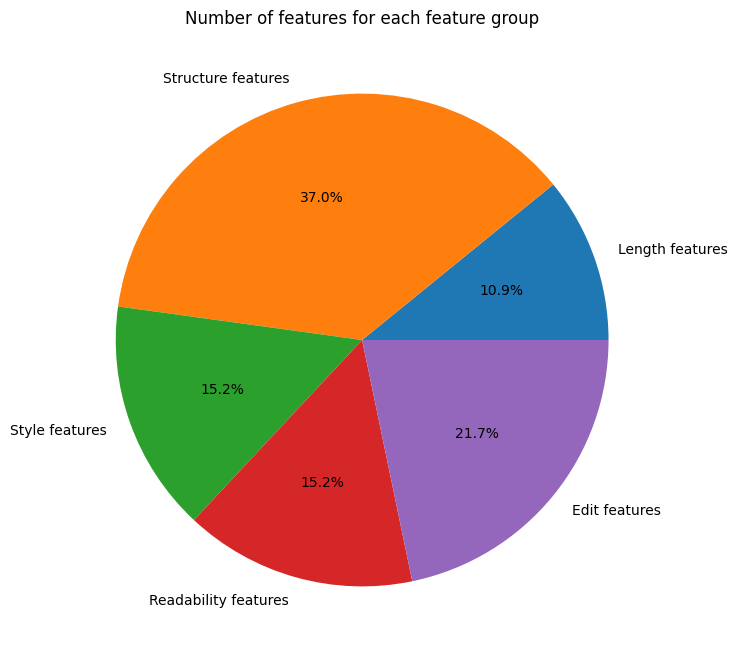

In [ ]:
# Pie chart of collect data
plt.figure(figsize=(8, 8))
plt.pie(no_features, labels=labels, autopct='%1.1f%%')

plt.title('Number of features for each feature group')
plt.show()